### Week_2 Assignment

In [8]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

### 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).

In [9]:
# Create a straight line dataset using the linear regression formula (`weight * X + bias`).

# Define the weight and bias for the line equation
weight = 0.3
bias = 0.9

# Generate the input values (X) in the desired range
start = 0
end = 10
step = (end - start) / 100  # To ensure at least 100 data points
X = torch.arange(start, end, step)

# Calculate the output values (y) based on the linear regression equation
y = weight * X + bias

# Print the first few data points for demonstration
print("X:", X[:5])
print("y:", y[:5])

X: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000])
y: tensor([0.9000, 0.9300, 0.9600, 0.9900, 1.0200])


In [10]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print()
print("Testing set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shapes:
X_train: torch.Size([80])
y_train: torch.Size([80])

Testing set shapes:
X_test: torch.Size([20])
y_test: torch.Size([20])


In [11]:
# Calculate the index for splitting the data
split_index = int(len(X) * 0.8)

# Split the data into training and testing sets
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Print the shapes of the training and testing sets
print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print()
print("Testing set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: torch.Size([80])
y_train: torch.Size([80])

Testing set shapes:
X_test: torch.Size([20])
y_test: torch.Size([20])


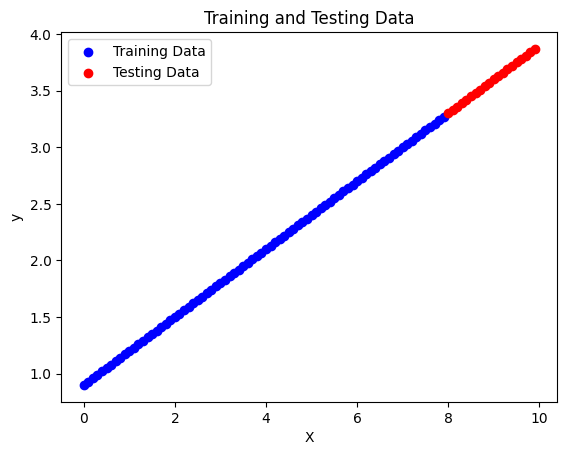

In [12]:
# Plot the training and testing data so it becomes visual
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot the testing data
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Testing Data')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [13]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

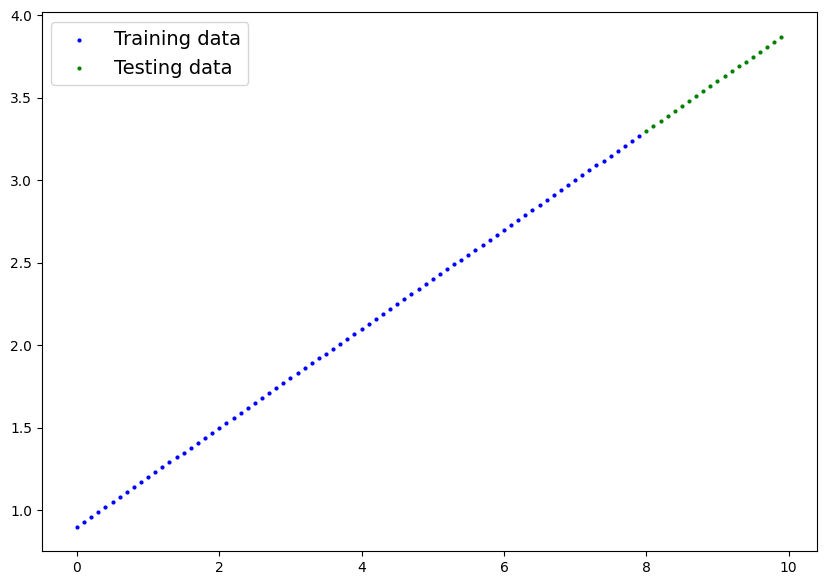

In [14]:
plot_predictions()

### 2. Build a PyTorch model by subclassing `nn.Module`. 

In [15]:
# Create a Linear Regression model class
class LinearRegressionModelEx(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [16]:
torch.manual_seed(42)
model_E = LinearRegressionModelEx()
model_E, model_E.state_dict()

(LinearRegressionModelEx(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

### 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 

In [17]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_E.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [18]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 300 

# Put data on the available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_E.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_E(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()
    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_E.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_E(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 15 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.6262636780738831 | Test loss: 0.07928689569234848
Epoch: 15 | Train loss: 0.29064279794692993 | Test loss: 0.41536545753479004
Epoch: 30 | Train loss: 0.26526281237602234 | Test loss: 0.3794569969177246
Epoch: 45 | Train loss: 0.23988278210163116 | Test loss: 0.34354862570762634
Epoch: 60 | Train loss: 0.21450278162956238 | Test loss: 0.3076402544975281
Epoch: 75 | Train loss: 0.18912281095981598 | Test loss: 0.2717319130897522
Epoch: 90 | Train loss: 0.1637427657842636 | Test loss: 0.23582354187965393
Epoch: 105 | Train loss: 0.13836275041103363 | Test loss: 0.19991517066955566
Epoch: 120 | Train loss: 0.1130274310708046 | Test loss: 0.1646774411201477
Epoch: 135 | Train loss: 0.08824575692415237 | Test loss: 0.10790665447711945
Epoch: 150 | Train loss: 0.0690813660621643 | Test loss: 0.2127888947725296
Epoch: 165 | Train loss: 0.08923406153917313 | Test loss: 0.023885179311037064
Epoch: 180 | Train loss: 0.04718475416302681 | Test loss: 0.3524232506752014
Epo

### 4. Make predictions with the trained model on the test data.

In [19]:
# Turn model into evaluation mode
model_E.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_E(X_test)
y_preds

tensor([3.2582, 3.2878, 3.3174, 3.3470, 3.3766, 3.4062, 3.4358, 3.4654, 3.4950,
        3.5246, 3.5542, 3.5838, 3.6134, 3.6430, 3.6726, 3.7022, 3.7318, 3.7614,
        3.7910, 3.8206])

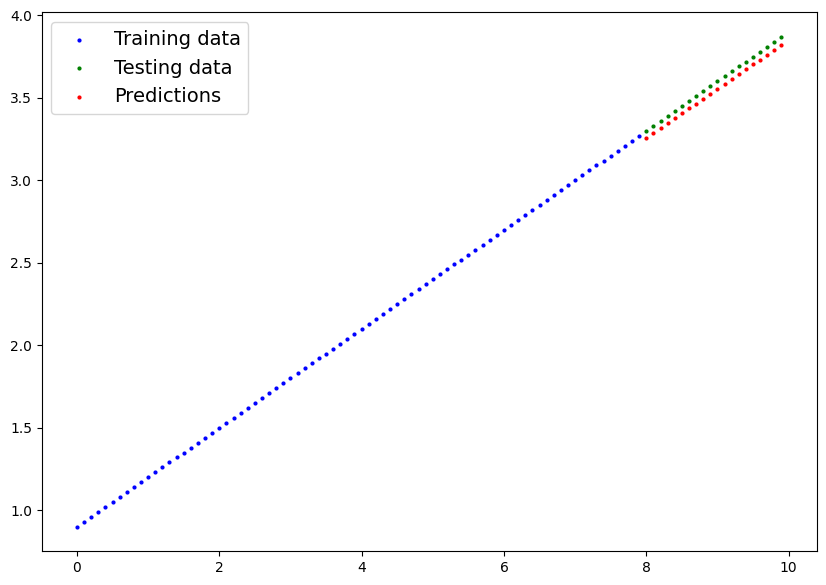

In [20]:
plot_predictions(predictions=y_preds.cpu())

### 5. Save your trained model's `state_dict()` to file.

In [21]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_E.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_E.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_E.pth


In [22]:
# Instantiate a fresh instance of LinearRegressionModelEx
loaded_model_E = LinearRegressionModelEx()

# Load model state dict 
loaded_model_E.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_E.to(device)

print(f"Loaded model:\n{loaded_model_E}")
print(f"Model on device:\n{next(loaded_model_E.parameters()).device}")

Loaded model:
LinearRegressionModelEx()
Model on device:
cpu


In [23]:
# Evaluate loaded model
loaded_model_E.eval()
with torch.inference_mode():
    loaded_model_E_preds = loaded_model_E(X_test)
y_preds == loaded_model_E_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])

## Advance Assignment

### Pytorch Foundamentals

In [24]:
# Question 1. Loading Data : Load the Synchronous Machine Learning Dataset as Numpy array
import zipfile
import pandas as pd
import requests
import numpy as np

url = "https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip"
file_path = "data.zip"

response = requests.get(url)
response.raise_for_status()

with open(file_path, "wb") as file:
    file.write(response.content)

with zipfile.ZipFile("data.zip", 'r') as my_zip:
    my_zip.extractall()
    
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=",")

#a. Load the Synchronous Machine Learning Dataset as Numpy array
numpy_data = data.values

In [25]:
print(data.head())
print(numpy_data)

   Iy  PF   e  dIf    If
0   3  66  34  383  1563
1   3  68  32  372  1552
2   3   7   3   36   154
3   3  72  28  338  1518
4   3  74  26  317  1497
[[   3   66   34  383 1563]
 [   3   68   32  372 1552]
 [   3    7    3   36  154]
 ...
 [   6   95    5   16  134]
 [   6   97    3   16  134]
 [   6   99    1   16  134]]


In [26]:
# b. Convert the Numpy array to PyTorch tensor, original_data_tensor
import torch
original_data_tensor = torch.tensor(numpy_data)

In [27]:
print(original_data_tensor)

tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])


In [28]:
# Question 2. Art of “Tensor Manipulation”
# a. print the size of the dataset
print(original_data_tensor.size())
print(original_data_tensor.shape)

torch.Size([557, 5])
torch.Size([557, 5])


In [29]:
""" b. Create a tensor, my_pi_tensor of same size as original original_data_tensor containing values of 3.142 at every point
and placed on your GPU device. Print the first 13 rows. Print tensor device location. Print tensor datatype."""
# Create my_pi_tensor with the same size as original_data_tensor
my_pi_tensor = torch.full_like(original_data_tensor, 3.142)

# Move my_pi_tensor to the GPU device if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
my_pi_tensor = my_pi_tensor.to(device)

# Print the first 13 rows of my_pi_tensor
print(my_pi_tensor[:13])

# Print tensor device location
print("Tensor Device:", my_pi_tensor.device)

# Print tensor datatype
print("Tensor Data Type:", my_pi_tensor.dtype)

tensor([[3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]])
Tensor Device: cpu
Tensor Data Type: torch.int64


In [30]:
# c. Print the fifth-root of sum of all values in my_pi_tensor
# Calculate the fifth root of the sum of all values in my_pi_tensor
result = torch.pow(my_pi_tensor.sum(), 1/5)

# Print the result
print("Fifth root of the sum:", result)

Fifth root of the sum: tensor(6.0868)


In [31]:
"""
d. Create a new tensor, my_data_tensor using the first and last 100 rows from the original_data_tensor. Print size of 
my_data_tensor
"""
# Select the first and last 100 rows from original_data_tensor
selected_rows = torch.cat((original_data_tensor[:100], original_data_tensor[-100:]))

# Create the new tensor my_data_tensor
my_data_tensor = selected_rows.clone()

# Print the size of my_data_tensor
print("Size of my_data_tensor:", my_data_tensor.size())

Size of my_data_tensor: torch.Size([200, 5])


In [32]:
"""
e. Create two 1-D tensors, features and target from my_data_tensor. The feature is dIf (Changing of excitation current 
of synchronous machine) I) column and target is If (Excitation current of synchronous machine)
"""
# Create *known* parameters
weight = 0.7
bias = 0.3

# Extract the "dIf" column as features tensor
features = my_data_tensor[:, 0]

# Extract the "If" column as target tensor
target = weight * my_data_tensor[:, 1] + bias


# Print the size of the tensors
print("Size of features tensor:", features.size())
print("Size of target tensor:", target.size())

Size of features tensor: torch.Size([200])
Size of target tensor: torch.Size([200])


In [33]:
# Create train/test split
train_split = int(0.75 * len(features)) # 75% of data used for training set, 25% for testing 
features_train, target_train = features[:train_split], target[:train_split]
features_test, target_test = features[train_split:], target[train_split:]

len(features_train), len(target_train), len(features_test), len(target_test)

(150, 150, 50, 50)

### Pytorch Workflow Foundamentals

In [34]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=features_train, 
                     train_labels=target_train, 
                     test_data=features_test, 
                     test_labels=target_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

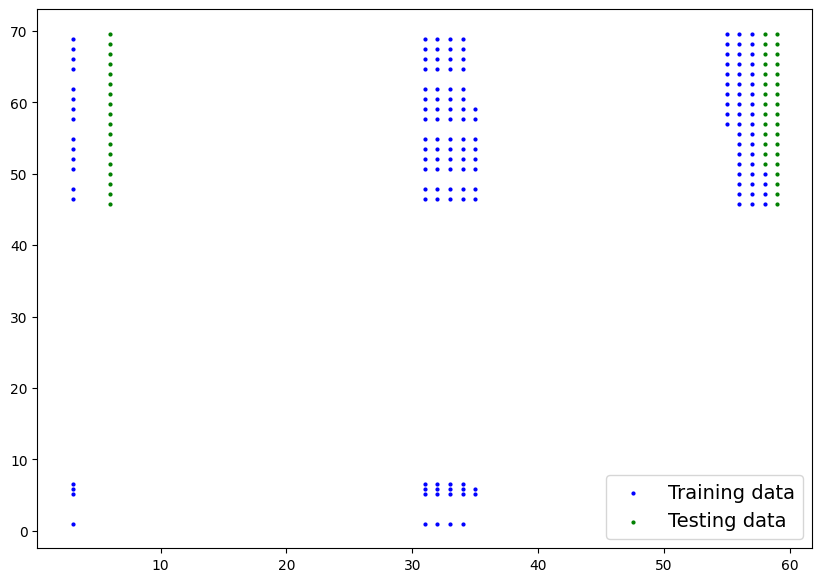

In [35]:
plot_predictions()

In [36]:
import torch.nn as nn
# Create a Linear Regression model class
class LinearRegressionModelAdvanceT(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [38]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_A = LinearRegressionModelAdvanceT()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_A.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [39]:
# List named parameters 
model_A.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [40]:
# Make predictions with model
with torch.inference_mode(): 
    target_preds = model_A(features_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [41]:
# Check the predictions
print(f"Number of testing samples: {len(features_test)}") 
print(f"Number of predictions made: {len(target_preds)}")
print(f"Predicted values:\n{target_preds}")

Number of testing samples: 50
Number of predictions made: 50
Predicted values:
tensor([19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569,
        19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.6569, 19.9935, 19.9935,
        19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935,
        19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935, 19.9935,
         2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,
         2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,  2.1490,
         2.1490,  2.1490])


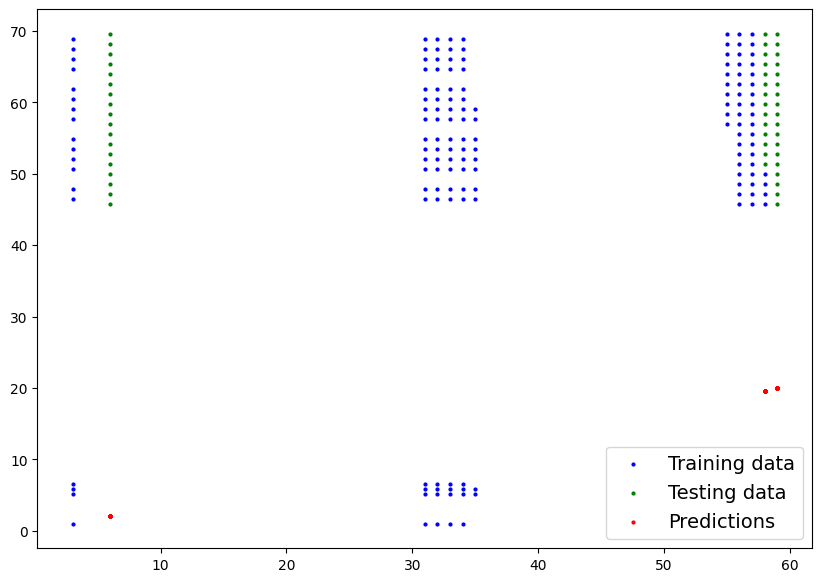

In [42]:
plot_predictions(predictions=target_preds)

In [43]:
target_test - target_preds

tensor([31.7431, 33.1432, 34.5431, 35.9431, 37.3431, 38.7431, 40.1432, 41.5431,
        42.9431, 44.3431, 45.7431, 47.1432, 48.5432, 49.9431, 25.8065, 27.2065,
        28.6065, 30.0065, 31.4065, 32.8065, 34.2065, 35.6065, 37.0065, 38.4065,
        39.8065, 41.2065, 42.6065, 44.0065, 45.4065, 46.8065, 48.2065, 49.6065,
        43.6510, 45.0510, 46.4510, 47.8510, 49.2510, 50.6510, 52.0510, 53.4510,
        54.8510, 56.2510, 57.6510, 59.0510, 60.4510, 61.8510, 63.2510, 64.6511,
        66.0511, 67.4510])

In [45]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_A.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [46]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_A.train()

    # 1. Forward pass on train data using the forward() method inside 
    target_pred = model_A(features_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(target_pred, target_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_A.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_A(features_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, target_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 38.85260009765625 | MAE Test Loss: 33.44229507446289 
Epoch: 10 | MAE Train Loss: 20.1838321685791 | MAE Test Loss: 24.359485626220703 
Epoch: 20 | MAE Train Loss: 20.178014755249023 | MAE Test Loss: 24.249868392944336 
Epoch: 30 | MAE Train Loss: 20.17315673828125 | MAE Test Loss: 24.34795379638672 
Epoch: 40 | MAE Train Loss: 20.167461395263672 | MAE Test Loss: 24.23833656311035 
Epoch: 50 | MAE Train Loss: 20.1624813079834 | MAE Test Loss: 24.3364315032959 
Epoch: 60 | MAE Train Loss: 20.156909942626953 | MAE Test Loss: 24.226816177368164 
Epoch: 70 | MAE Train Loss: 20.151880264282227 | MAE Test Loss: 24.321123123168945 
Epoch: 80 | MAE Train Loss: 20.146333694458008 | MAE Test Loss: 24.211509704589844 
Epoch: 90 | MAE Train Loss: 20.14127540588379 | MAE Test Loss: 24.30582046508789 


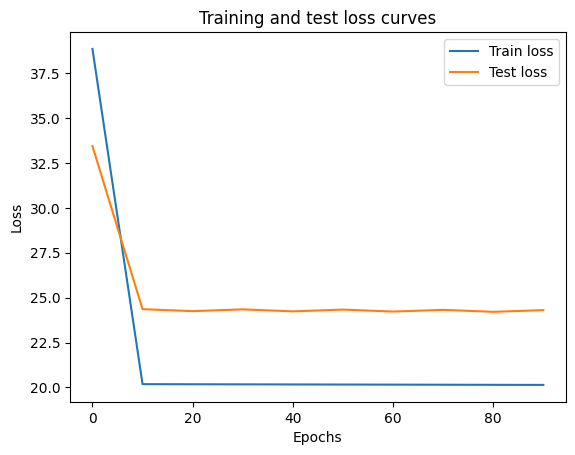

In [47]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [49]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_A.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([1.1594])), ('bias', tensor([0.3735]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [50]:
# 1. Set the model in evaluation mode
model_A.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  target_preds = model_A(features_test)
target_preds

tensor([67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161,
        67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 67.6161, 68.7755, 68.7755,
        68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755,
        68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755, 68.7755,
         7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,
         7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,  7.3296,
         7.3296,  7.3296])

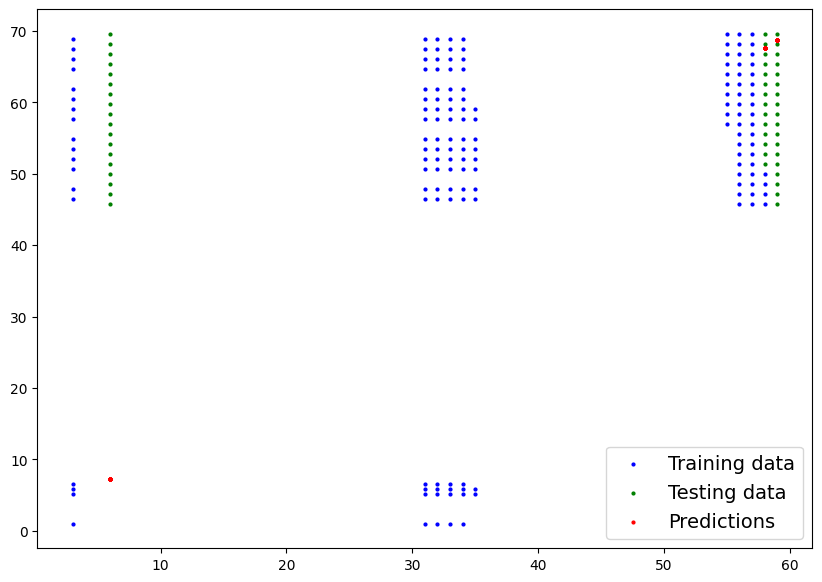

In [51]:
plot_predictions(predictions=target_preds)

In [53]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_A.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [54]:
# Check the saved file path
!dir models\01_pytorch_workflow_model_0.pth

 Volume in drive C has no label.
 Volume Serial Number is FC15-CE7C

 Directory of c:\Users\hp\Desktop\Coding Base Folder\arewaDSDeepLearning\exercise_submissions\week_2\models

12/31/2023  12:12 PM             1,680 01_pytorch_workflow_model_0.pth
               1 File(s)          1,680 bytes
               0 Dir(s)  148,628,221,952 bytes free


### The observations about the model

The model's test loss is higher than its training loss, which suggests that the model is experiencing some degree of overfitting. It seems that the model learns to perform well on the training data but fails to generalize well to unseen data. This is also evident in the graph of test data, train data and the predicted values. The values can be seen to be distributed around in the graph. The model is essentially memorizing the training data, including its noise and outliers, rather than learning the underlying patterns and relationships. As a result, the model's performance on the training data tends to be better than its performance on new, unseen data.
These are some reasons for this:
1. Complexity of the model: The model may be too complex and has learned to fit the training data too closely. As a result, it fails to generalize well to new data, leading to higher test loss but here our model is not complex, so this may not be one of the reasons, as our model in consideration is not that complex but rather a simple linear model.
2. Insufficient training data: The model has been trained on a limited amount of data, it may not have captured the full variability and complexity of the underlying problem. Consequently, the model may struggle to generalize to unseen data, resulting in higher test loss. This is the possible and reason for the inability of our model to generalized on unseen data. It has been train on sufficient data and hence it has not been able to generalize very well.
3. Data mismatch: There may be a mismatch between the training and test data. If the test data differs significantly from the training data in terms of distribution or characteristics, the model may struggle to perform well on the test data, leading to higher test loss. There has been any data mismatch in both our training and test data. Hence this is not one of the issues of our model at present.
Regularization techniques: Regularization techniques like dropout or weight decay are often applied during training to prevent overfitting. If these techniques are not applied during testing or evaluation, the test loss may appear higher. Drop out and weight decay has not actually been applied here as the model is just a small linear model that has not drop out layer. Weight decay too has not been applied to assist in improving the model during back propagation.
To address overfitting, we can consider employing techniques such as increasing the size of the training dataset, applying regularization techniques, simplifying the model architecture, or using techniques like cross-validation to better assess the model's performance.
